<a href="https://www.kaggle.com/code/shandeep777/flight-price-prediction-in-python?scriptVersionId=226458573" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [6]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [7]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [8]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df['duration'].min() , df['duration'].max() , df['duration'].mean() 

(0.83, 49.83, 12.221020812718846)

### Preprocessing

In [10]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('flight',axis=1)


df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [11]:
df.stops = pd.factorize(df.stops)[0]

In [12]:
import pandas as pd

df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)


In [13]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### Training Regression Model

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [15]:
X , y = df.drop('price', axis=1) , df.price

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)

In [17]:
reg = RandomForestRegressor(n_jobs=-1)

In [18]:
reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [19]:
reg.score(X_train,y_train)

0.9975099360286664

In [20]:
import math
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [21]:
y_pred = reg.predict(X_test)
print('R2 :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',math.sqrt(mean_squared_error(y_test,y_pred)))

R2 : 0.9851757157167275
MAE : 1070.206724325002
MSE : 7615109.614327082
RMSE : 2759.5488062955296


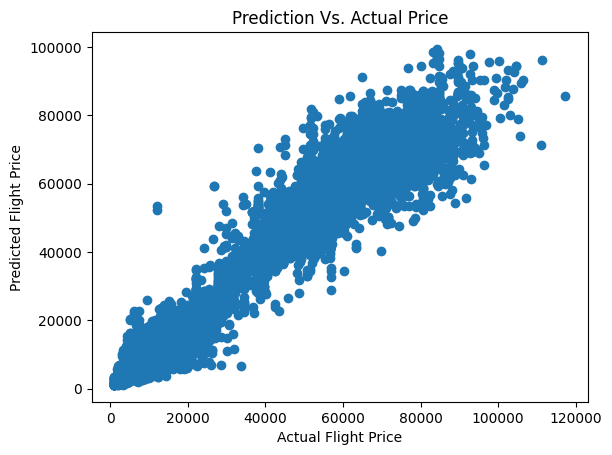

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction Vs. Actual Price')
plt.show()

In [23]:
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [24]:
importance = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
sorted_importance


[('class', 0.8798670311023186),
 ('duration', 0.057602914305200655),
 ('days_left', 0.018559751241668088),
 ('airline_Vistara', 0.00519466427538628),
 ('airline_Air_India', 0.004825514864613542),
 ('source_Delhi', 0.003821157133684637),
 ('dest_Delhi', 0.0034224923601439243),
 ('source_Mumbai', 0.0022194754997169205),
 ('dest_Mumbai', 0.0018725152883230436),
 ('stops', 0.001867708561768568),
 ('dest_Kolkata', 0.0018461442275542743),
 ('source_Kolkata', 0.0017060116709653858),
 ('dest_Hyderabad', 0.0015439818745909659),
 ('arrival_Evening', 0.0014681779447752294),
 ('dest_Bangalore', 0.0011798199305087086),
 ('arrival_Night', 0.001171174859812467),
 ('departure_Evening', 0.0011610534805231772),
 ('source_Hyderabad', 0.0011249245676778908),
 ('source_Bangalore', 0.0011168231286467914),
 ('arrival_Afternoon', 0.0010224881330441603),
 ('source_Chennai', 0.000927719868492787),
 ('dest_Chennai', 0.0009223941223178182),
 ('departure_Morning', 0.0008520911882455934),
 ('departure_Afternoon', 0

In [25]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

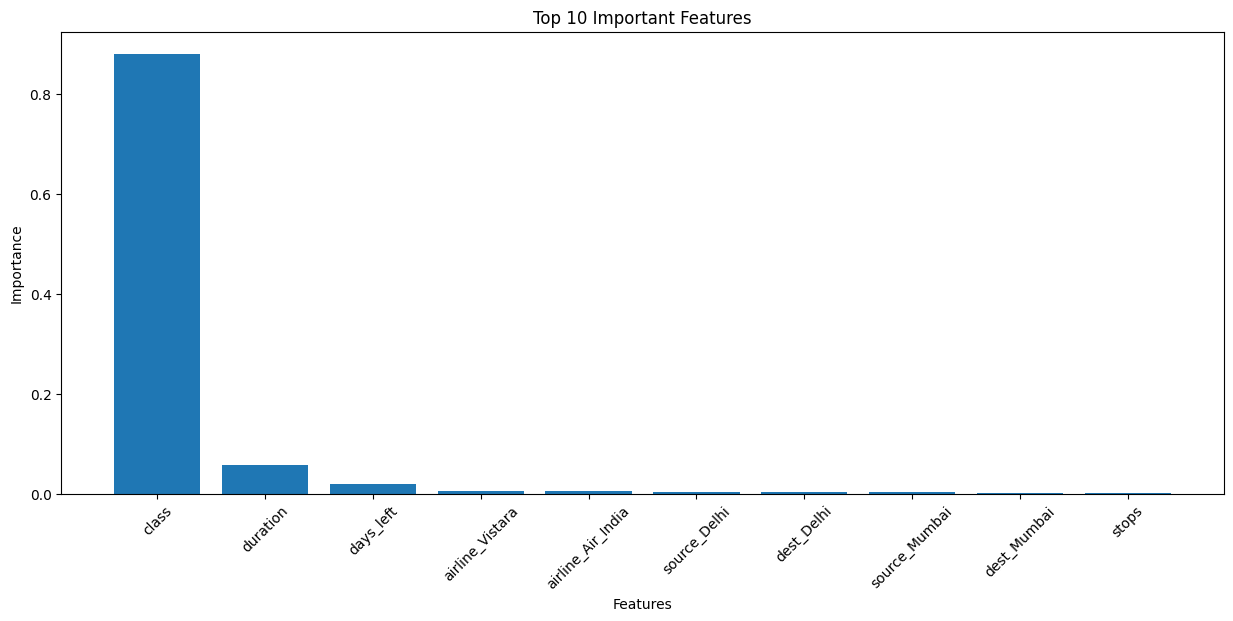

In [26]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importance[:10]], [x[1] for x in sorted_importance[:10]])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 10 Important Features")
plt.show()
